# Introduction to Deep Learning & Neural Networks with Keras Final

<a id = 'toc'></a>
## Table of Contents

[1. Loading Libraries](#s1)

[2. Import Data](#s2)

[3. Train/Test Split](#s3)

[4. Setting OLS Baseline](#s4)

[5. Build the Baseline Neural Network](#s5)

[6. Baseline Regression with Normalized Data](#s6)

[7. Second Regression with 100 Epochs](#s7)

[8. Regression with 3x Hidden Layers (10x Nodes Ea.)](#s8)


<a id = 's1'></a>
## 1. Loading Libraries

Here are the libraries I'm using initiatlly.

[Table of Contents](#toc)

In [18]:
# Import top libraries
import tensorflow as tf
from tensorflow import keras

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

<a id = 's2'></a>
## 2. Import Data

Let's pull in the concrete data!

[Table of Contents](#toc)

In [20]:
# Reading in Concrete Data
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
#A Quick Look at the data
## Some fields have considerable skew
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<a id = 's3'></a>
## 3. Train/Test Split

Lets split the data!

[Table of Contents](#toc)

In [22]:
# Using a little list comprehension to filter out the names of columns I don't want
X = concrete_data[[col for col in concrete_data.columns if col != 'Strength']]
y = concrete_data[['Strength']]

<a id = 's4'></a>
## 4. Setting OLS Baseline

Always set a baseline with a linear model.  105 is the MSE to beat!

[Table of Contents](#toc)

Coefficients: 
 [[ 0.11883248  0.09832464  0.08004253 -0.1245378   0.44345559  0.02005728
   0.02358271  0.11776063]]
MSE: 
 105.24762600345566
R2 Score: 
 0.6011079327652087


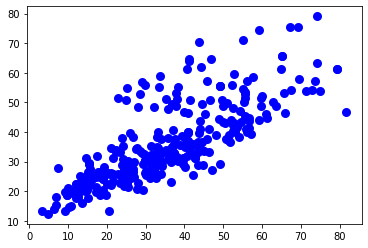

In [23]:
reg = linear_model.LinearRegression()
r1 = reg.fit(X_train,y_train)
y_pred = r1.predict(X_test)

print('Coefficients: \n', r1.coef_)
print('MSE: \n',mean_squared_error(y_test,y_pred))
print('R2 Score: \n', r2_score(y_test,y_pred))

plt.scatter(y_test, y_pred, color='blue', linewidth=3)

<a id = 's5'></a>
## 5. Build the Baseline Neural Network

#### A. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

[Table of Contents](#toc)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
def regression_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [46]:
from IPython.display import clear_output

class baseline_regression_model:
    
    def __init__(self,X,y,model,split=.3,seed=123, normalize = False, epochs=50,val_split=.3):
        
        """
        1. Sets conditions for running a neural network and its validation. 
            a. Epochs set to 50 by default.
            b. Val_split set to .3 by default
        2. Performs the train test split during construction, with random seed 123 and split .30 as defaults.
            a. Will normalize X by subtracting the mean and dividing by the standard deviation if normalize is set to True. It
            is False by default.
            
        Expects:
            X: (DataFrame, Matrix, or Array) A vector of Independent Variables 
            y: (1 Column Dataframe or Array) Your Dependent Variable
            model: (keras Sequential Model)
            epochs: (Number of Epochs)
            val_split: (Split for validation set)
            
        Returns:
            None
        """
        
        # Normalizes the data with the following formula: (X_i - Mean(X)) / Standard_Deviation(X)
        if normalize == True:
            X = (X - X.mean()) / X.std()
            
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split, random_state = seed)
        
        self.X_train = X_train
        self.y_train = y_train 
        self.X_test = X_test
        self.y_test = y_test 
        self.model = model
        self.epochs = epochs
        self.val_split = val_split
        
    def run_model(self): 
        """
        Runs Model.          
        Expects:
            X_train (DataFrame, Matrix, or Array) A vector of Independent Variables 
            y_train (1 Column Dataframe or Array) Your Dependent Variable
            model (keras Sequential Model)
            epochs (Number of Epochs)
            val_split (Split for validation set)
            
        Returns:
            Historic_loss_df: A 2 column DF of val_loss and loss.
            loss_array: A numpy array of all the last loss statistics.
            History: The full fit model
            
        """
        loss_array = np.array([])
        historic_loss_df = pd.DataFrame(columns = ['val_loss','loss'])
        for i in range(1,51):
            print(f'Currently at run {i} of {self.epochs}!')
            clear_output(wait=True) # Clears the output
            history = model.fit(self.X_train, self.y_train, validation_split= self.val_split, epochs= self.epochs ,verbose = 0) #trains the model
            loss_array = np.append(loss_array,history.history['val_loss'][-1]) #Creates an np array of the loss to take the avg/std of later
            #populates a df for a fancy visual later
            if historic_loss_df.empty:
                historic_loss_df = pd.DataFrame(history.history)
            else:
                historic_loss_df = pd.concat([historic_loss_df,pd.DataFrame(history.history)])
        self.historic_loss_df = historic_loss_df
        self.loss_array = loss_array
        self.history = history
      
    def validation_statistics(self):
        """
        Runs Regression Validations Statistics.          
        Expects:
            X_train (DataFrame, Matrix, or Array) A vector of Independent Variables 
            y_train (1 Column Dataframe or Array) Your Dependent Variable
            model (keras Sequential Model)
            epochs (Number of Epochs)
            val_split (Split for validation set)
            
        Returns:
            -The Average of every iteration's MSE 
            -The Standard Deviation of every iteration's MSE 
            -The Maximum MSE 
            -The Minimum MSE 
            -The Last Iteration's Loss 
            -A graph of loss vs val_loss
            
        """
        print(f"""The Average of every iteration's MSE is: {np.mean(self.loss_array)}
            The Standard Deviation of every iteration's MSE is: {np.std(self.loss_array)}
            The Maximum MSE is: {np.max(self.loss_array)}
            The Minimum MSE is: {np.min(self.loss_array)}
            The Last Iteration's Loss was: {self.loss_array[-1]}
            The Test set's MSE is : {self.model.evaluate(self.X_test,self.y_test)}
            \n""")
        self.historic_loss_df.reset_index().drop(columns=['index']).plot(figsize=(8,5))
        plt.grid(True)
        plt.show()
                

309/309 [==============================] - 0s 26us/step
The Average of every iteration's MSE is: 650.5943110199679
            The Standard Deviation of every iteration's MSE is: 380.36076656308467
            The Maximum MSE is: 1486.011201216878
            The Minimum MSE is: 249.66671534946985
            The Last Iteration's Loss was: 249.66671534946985
            The Test set's MSE is : 264.85857008653164
            



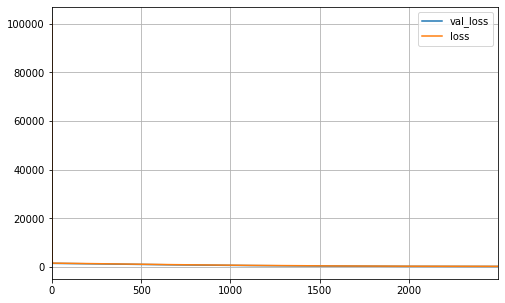

In [42]:
model = regression_model()
brm = baseline_regression_model(X=X,y=y,model=model)
brm.run_model()
brm.validation_statistics()

<a id = 's6'></a>
## 6. Baseline Regression with Normalized Data

C. Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

[Table of Contents](#toc)

309/309 [==============================] - 0s 39us/step
The Average of every iteration's MSE is: 44.41393109158986
            The Standard Deviation of every iteration's MSE is: 14.039068570056513
            The Maximum MSE is: 132.1188002907186
            The Minimum MSE is: 37.564000617523895
            The Last Iteration's Loss was: 41.40921675334878
            The Test set's MSE is : 35.67991720897094
            



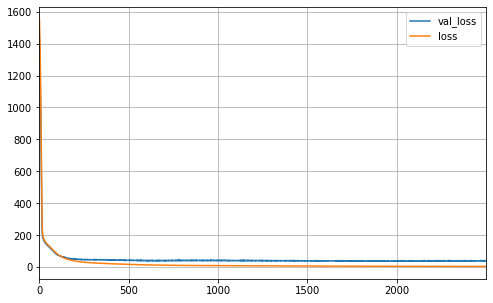

In [47]:
model = regression_model()
brm_norm = baseline_regression_model(X=X,y=y,model=model,normalize=True)
brm_norm.run_model()
brm_norm.validation_statistics()

<a id = 's7'></a>
## 7. Second Regression with 100 Epochs

C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

[Table of Contents](#toc)

In [ ]:
model = regression_model()
brm_norm_100 = baseline_regression_model(X=X,y=y,model=model,epochs=100,normalize=True)
brm_norm_100.run_model()
brm_norm_100.validation_statistics()

Currently at run 13 of 100!


<a id = 's8'></a>
## 8.  Regression with 3x Hidden Layers (10x Nodes Ea.)

D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

[Table of Contents](#toc)

In [ ]:
# Define new Model
def second_regression_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [ ]:
model = second_regression_model()
brm_3x = baseline_regression_model(X=X,y=y,model=model,epochs=100,normalize=True)
brm_3x.run_model()
brm_3x.validation_statistics()